In [1]:
from __future__ import division
import matplotlib.pyplot as plt
import pandas as pds
import seaborn as sns
import numpy as np
import random
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from scipy import stats
%matplotlib inline
np.random.seed(10)
random.seed(10)

/Users/Noemie/miniconda3/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
df = pds.read_csv('data2.txt',sep='\t')


In [3]:
df.head()

,Time,Time Code,Country Name,Country Code,Adjusted net national income (current US$) [NY.ADJ.NNTY.CD],"Air transport, passengers carried [IS.AIR.PSGR]",Average precipitation in depth (mm per year) [AG.LND.PRCP.MM],Employment in industry (% of total employment) (modeled ILO estimate) [SL.IND.EMPL.ZS],"Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]",Food exports (% of merchandise exports) [TX.VAL.FOOD.ZS.UN],Forest area (% of land area) [AG.LND.FRST.ZS],Individuals using the Internet (% of population) [IT.NET.USER.ZS],Land area (sq. km) [AG.LND.TOTL.K2],"Life expectancy at birth, total (years) [SP.DYN.LE00.IN]",GDP (current US$) [NY.GDP.MKTP.CD],"International tourism, number of arrivals [ST.INT.ARVL]"
0,2012,YR2012,Afghanistan,AFG,1.812556e+10,1.737962e+06,327.0,6.298000,5.380,17.437223,2.067825,5.454545,652860.0,62.086,2.053654e+10,NaN
1,2012,YR2012,Albania,ALB,1.056092e+10,8.143397e+05,1485.0,16.542999,1.685,4.577602,28.262044,54.655959,27400.0,77.389,1.231978e+10,3156000.0
2,2012,YR2012,Algeria,DZA,1.660026e+11,4.082595e+06,89.0,40.745998,2.936,0.445065,0.811675,18.200000,2381740.0,75.187,2.090590e+11,2634000.0
3,2012,YR2012,American Samoa,ASM,NaN,5.609698e+04,NaN,NaN,NaN,NaN,88.200000,NaN,200.0,NaN,6.440000e+08,22600.0
4,2012,YR2012,Andorra,AND,NaN,NaN,NaN,NaN,NaN,1.221122,34.042553,86.434425,470.0,NaN,3.164615e+09,2238000.0


In [4]:
df.isna().sum(axis=0)

Time                                                                                       3
Time Code                                                                                  5
Country Name                                                                               5
Country Code                                                                               5
Adjusted net national income (current US$) [NY.ADJ.NNTY.CD]                               51
Air transport, passengers carried [IS.AIR.PSGR]                                           64
Average precipitation in depth (mm per year) [AG.LND.PRCP.MM]                             78
Employment in industry (% of total employment) (modeled ILO estimate) [SL.IND.EMPL.ZS]    36
Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]                                 21
Food exports (% of merchandise exports) [TX.VAL.FOOD.ZS.UN]                               67
Forest area (% of land area) [AG.LND.FRST.ZS]                         

In [5]:
#dff = df.drop(["Intentional homicides (per 100,000 people) [VC.IHR.PSRC.P5]"],axis=1)
#dff = dff.drop(["Children out of school (% of primary school age) [SE.PRM.UNER.ZS]"],axis=1)

In [6]:
#dff.head()

In [7]:
df = df.set_index(["Country Name", "Country Code"])

In [8]:
df.shape

(269, 14)

In [9]:
df = df.dropna()

In [10]:
df.shape

(125, 14)

In [11]:
df.head()

,,Time,Time Code,Adjusted net national income (current US$) [NY.ADJ.NNTY.CD],"Air transport, passengers carried [IS.AIR.PSGR]",Average precipitation in depth (mm per year) [AG.LND.PRCP.MM],Employment in industry (% of total employment) (modeled ILO estimate) [SL.IND.EMPL.ZS],"Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]",Food exports (% of merchandise exports) [TX.VAL.FOOD.ZS.UN],Forest area (% of land area) [AG.LND.FRST.ZS],Individuals using the Internet (% of population) [IT.NET.USER.ZS],Land area (sq. km) [AG.LND.TOTL.K2],"Life expectancy at birth, total (years) [SP.DYN.LE00.IN]",GDP (current US$) [NY.GDP.MKTP.CD],"International tourism, number of arrivals [ST.INT.ARVL]"
Country Name,Country Code,,,,,,,,,,,,,,
Albania,ALB,2012,YR2012,1.056092e+10,8.143397e+05,1485.0,16.542999,1.685,4.577602,28.262044,54.655959,27400.0,77.389,1.231978e+10,3156000.0
Algeria,DZA,2012,YR2012,1.660026e+11,4.082595e+06,89.0,40.745998,2.936,0.445065,0.811675,18.200000,2381740.0,75.187,2.090590e+11,2634000.0
Angola,AGO,2012,YR2012,3.730638e+10,1.132424e+06,1010.0,8.601000,6.000,0.063120,46.707628,6.500000,1246700.0,59.770,1.139232e+11,528000.0
Argentina,ARG,2012,YR2012,4.710316e+11,9.375670e+06,591.0,23.656000,2.347,53.663431,10.232215,55.800000,2736690.0,75.926,5.459824e+11,5587000.0
Armenia,ARM,2012,YR2012,9.453687e+09,3.647330e+05,562.0,17.691999,1.664,25.920984,11.640323,37.500000,28470.0,73.814,1.061932e+10,963000.0


In [12]:
dff = df.drop(["Time"], axis=1)

In [13]:
dff = dff.drop(["Time Code"], axis=1)

In [14]:
dff.describe()

,Adjusted net national income (current US$) [NY.ADJ.NNTY.CD],"Air transport, passengers carried [IS.AIR.PSGR]",Average precipitation in depth (mm per year) [AG.LND.PRCP.MM],Employment in industry (% of total employment) (modeled ILO estimate) [SL.IND.EMPL.ZS],"Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]",Food exports (% of merchandise exports) [TX.VAL.FOOD.ZS.UN],Forest area (% of land area) [AG.LND.FRST.ZS],Individuals using the Internet (% of population) [IT.NET.USER.ZS],Land area (sq. km) [AG.LND.TOTL.K2],"Life expectancy at birth, total (years) [SP.DYN.LE00.IN]",GDP (current US$) [NY.GDP.MKTP.CD],"International tourism, number of arrivals [ST.INT.ARVL]"
count,1.250000e+02,1.250000e+02,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,1.250000e+02,125.000000,1.250000e+02,1.250000e+02
mean,4.648238e+11,2.192107e+07,1167.144000,20.227216,2.698190,19.952205,32.911336,41.626827,8.885764e+05,71.808318,5.637589e+11,7.444791e+06
std,1.507424e+12,7.429768e+07,770.689655,7.930120,1.383543,18.942856,21.757971,27.633271,2.231898e+06,7.741353,1.785186e+12,1.350931e+07
min,6.011972e+08,0.000000e+00,51.000000,3.946000,1.269000,0.000000,0.006462,1.050000,7.060000e+02,51.463000,9.100262e+08,8.900000e+04
25%,1.352148e+10,5.931984e+05,593.000000,15.801000,1.664000,5.881806,13.397849,14.520000,5.596000e+04,67.377000,1.584647e+10,8.590000e+05
50%,4.194079e+10,2.206070e+06,1028.000000,20.171000,2.236000,14.522065,33.324829,40.301895,2.275400e+05,73.814000,5.656548e+10,2.156000e+06
75%,2.393276e+11,1.228956e+07,1705.000000,25.083000,3.072000,27.137740,47.747036,62.309997,6.531500e+05,76.924390,2.793728e+11,7.560000e+06
max,1.400189e+13,7.366990e+08,3240.000000,45.127998,7.420000,87.089810,98.355128,96.209800,1.637687e+07,83.096098,1.615526e+13,8.198000e+07


In [15]:
dff.head()

,,Adjusted net national income (current US$) [NY.ADJ.NNTY.CD],"Air transport, passengers carried [IS.AIR.PSGR]",Average precipitation in depth (mm per year) [AG.LND.PRCP.MM],Employment in industry (% of total employment) (modeled ILO estimate) [SL.IND.EMPL.ZS],"Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]",Food exports (% of merchandise exports) [TX.VAL.FOOD.ZS.UN],Forest area (% of land area) [AG.LND.FRST.ZS],Individuals using the Internet (% of population) [IT.NET.USER.ZS],Land area (sq. km) [AG.LND.TOTL.K2],"Life expectancy at birth, total (years) [SP.DYN.LE00.IN]",GDP (current US$) [NY.GDP.MKTP.CD],"International tourism, number of arrivals [ST.INT.ARVL]"
Country Name,Country Code,,,,,,,,,,,,
Albania,ALB,1.056092e+10,8.143397e+05,1485.0,16.542999,1.685,4.577602,28.262044,54.655959,27400.0,77.389,1.231978e+10,3156000.0
Algeria,DZA,1.660026e+11,4.082595e+06,89.0,40.745998,2.936,0.445065,0.811675,18.200000,2381740.0,75.187,2.090590e+11,2634000.0
Angola,AGO,3.730638e+10,1.132424e+06,1010.0,8.601000,6.000,0.063120,46.707628,6.500000,1246700.0,59.770,1.139232e+11,528000.0
Argentina,ARG,4.710316e+11,9.375670e+06,591.0,23.656000,2.347,53.663431,10.232215,55.800000,2736690.0,75.926,5.459824e+11,5587000.0
Armenia,ARM,9.453687e+09,3.647330e+05,562.0,17.691999,1.664,25.920984,11.640323,37.500000,28470.0,73.814,1.061932e+10,963000.0


In [33]:
df_km = dff.iloc[:,[0,7,8,9,11]]
#Jeu de données pour faire le k_means
#Y a-t-il un lien entre les variables sélectionnées ?

In [34]:
df_km.head()

,,Adjusted net national income (current US$) [NY.ADJ.NNTY.CD],Individuals using the Internet (% of population) [IT.NET.USER.ZS],Land area (sq. km) [AG.LND.TOTL.K2],"Life expectancy at birth, total (years) [SP.DYN.LE00.IN]","International tourism, number of arrivals [ST.INT.ARVL]"
Country Name,Country Code,,,,,
Albania,ALB,1.056092e+10,54.655959,27400.0,77.389,3156000.0
Algeria,DZA,1.660026e+11,18.200000,2381740.0,75.187,2634000.0
Angola,AGO,3.730638e+10,6.500000,1246700.0,59.770,528000.0
Argentina,ARG,4.710316e+11,55.800000,2736690.0,75.926,5587000.0
Armenia,ARM,9.453687e+09,37.500000,28470.0,73.814,963000.0


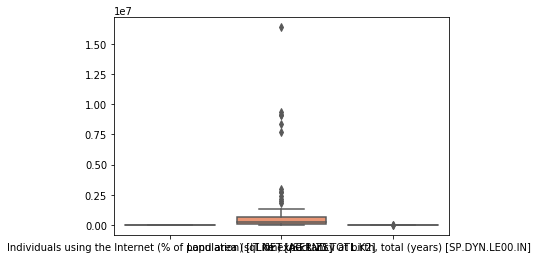

In [18]:
sns.boxplot(data=df_km.iloc[:,[1,2,3]], orient="v", palette="Set2")

/Users/Noemie/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


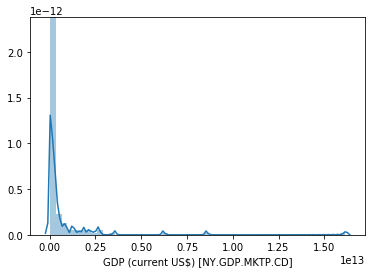

In [19]:
sns.distplot(dff["GDP (current US$) [NY.GDP.MKTP.CD]"])

In [35]:
GDP  = dff["GDP (current US$) [NY.GDP.MKTP.CD]"]
max(GDP)
min(GDP)


910026155.731035

In [21]:
np.percentile?

/Users/Noemie/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


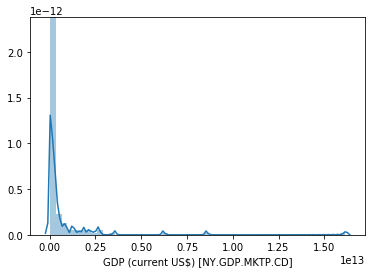

In [22]:
sns.distplot(GDP)

In [36]:
cat = np.percentile(GDP, [0,33,66, 100])
cat

array([9.10026156e+08, 2.50056880e+10, 2.07899026e+11, 1.61552550e+13])

In [24]:
#sex = ["male" if s == 1 else "female" for s in df_older["SEX"] ]
GDP_cat = ["pauvre" if val < cat[1] else "inter" if val < cat[2] and val > cat[1] else "riche" for val in dff["GDP (current US$) [NY.GDP.MKTP.CD]" ]]

In [25]:
from collections import Counter
Counter(GDP_cat) 

Counter({'pauvre': 41, 'riche': 43, 'inter': 41})

In [37]:
df_km.head()

,,Adjusted net national income (current US$) [NY.ADJ.NNTY.CD],Individuals using the Internet (% of population) [IT.NET.USER.ZS],Land area (sq. km) [AG.LND.TOTL.K2],"Life expectancy at birth, total (years) [SP.DYN.LE00.IN]","International tourism, number of arrivals [ST.INT.ARVL]"
Country Name,Country Code,,,,,
Albania,ALB,1.056092e+10,54.655959,27400.0,77.389,3156000.0
Algeria,DZA,1.660026e+11,18.200000,2381740.0,75.187,2634000.0
Angola,AGO,3.730638e+10,6.500000,1246700.0,59.770,528000.0
Argentina,ARG,4.710316e+11,55.800000,2736690.0,75.926,5587000.0
Armenia,ARM,9.453687e+09,37.500000,28470.0,73.814,963000.0


In [42]:
#df_km.mean(axis=0)
#df_km_c  = df_km - df_km.mean(axis=0)
print(df_km.mean())
print(df_km.std())
normalized_df_km = ( (df_km-df_km.mean()) / df_km.std() )

Adjusted net national income (current US$) [NY.ADJ.NNTY.CD]          4.648238e+11
Individuals using the Internet (% of population) [IT.NET.USER.ZS]    4.162683e+01
Land area (sq. km) [AG.LND.TOTL.K2]                                  8.885764e+05
Life expectancy at birth, total (years) [SP.DYN.LE00.IN]             7.180832e+01
International tourism, number of arrivals [ST.INT.ARVL]              7.444791e+06
dtype: float64
Adjusted net national income (current US$) [NY.ADJ.NNTY.CD]          1.507424e+12
Individuals using the Internet (% of population) [IT.NET.USER.ZS]    2.763327e+01
Land area (sq. km) [AG.LND.TOTL.K2]                                  2.231898e+06
Life expectancy at birth, total (years) [SP.DYN.LE00.IN]             7.741353e+00
International tourism, number of arrivals [ST.INT.ARVL]              1.350931e+07
dtype: float64


In [46]:
# Dataframe KM normalisée

In [43]:
normalized_df_km.head()

,,Adjusted net national income (current US$) [NY.ADJ.NNTY.CD],Individuals using the Internet (% of population) [IT.NET.USER.ZS],Land area (sq. km) [AG.LND.TOTL.K2],"Life expectancy at birth, total (years) [SP.DYN.LE00.IN]","International tourism, number of arrivals [ST.INT.ARVL]"
Country Name,Country Code,,,,,
Albania,ALB,-0.301350,0.471502,-0.385849,0.720892,-0.317469
Algeria,DZA,-0.198233,-0.847776,0.669011,0.436446,-0.356109
Angola,AGO,-0.283608,-1.271179,0.160457,-1.555066,-0.512002
Argentina,ARG,0.004118,0.512902,0.828046,0.531907,-0.137519
Armenia,ARM,-0.302085,-0.149343,-0.385370,0.259087,-0.479802


In [47]:
# Ajoute la variable catégoriele GDP_cat
normalized_df_km["GDP_cat"] = GDP_cat

/Users/Noemie/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [48]:
sns.scatterplot(data=df_km, x="Food exports (% of merchandise exports) [TX.VAL.FOOD.ZS.UN]", y="Land area (sq. km) [AG.LND.TOTL.K2]", hue="GDP_cat")

ValueError: Could not interpret input 'Food exports (% of merchandise exports) [TX.VAL.FOOD.ZS.UN]'

KeyError: 'GDP_cat'

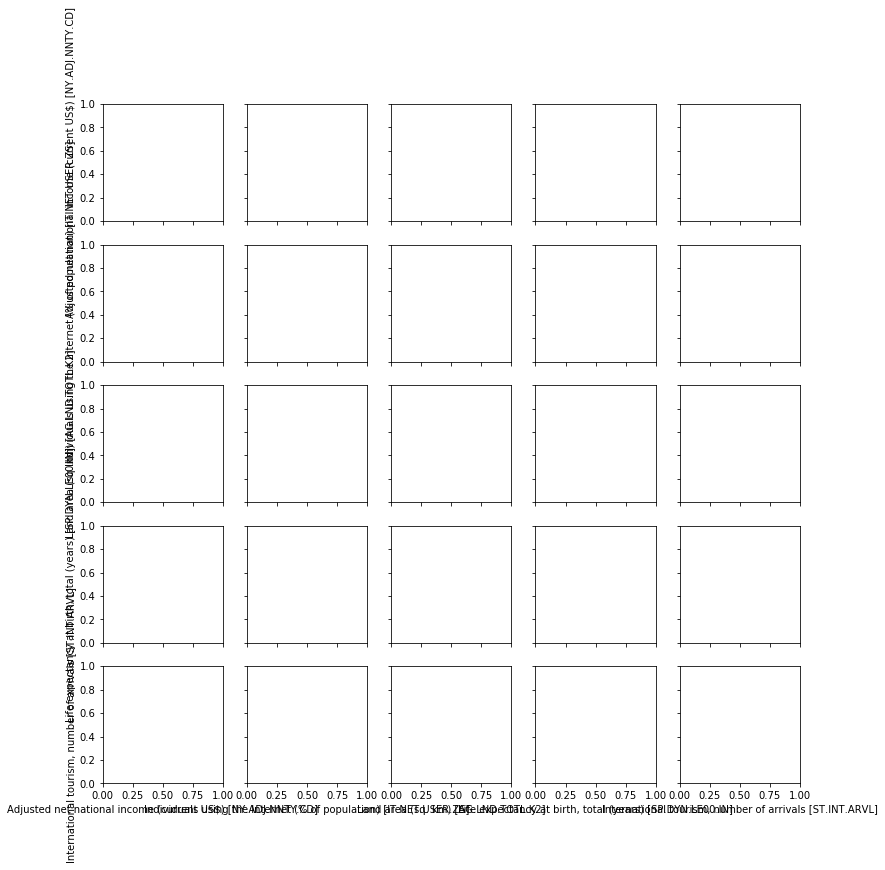

In [45]:
sns.pairplot(data=df_km, hue="GDP_cat")